In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [3]:
df = pd.read_csv(r'/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv')

In [4]:
df.sample(5)

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
236,236,Southern,Tamil Nadu,Chennai,Marina Beach,Beach,Unknown,1.5,3.9,0,Yes,NaN,Recreational,Yes,0.10,Morning
299,299,Eastern,Bihar,Patna,Sanjay Gandhi Biological Park,Zoo,Unknown,2.5,4.3,30,Yes,NaN,Wildlife,Yes,0.50,All
30,30,Southern,Karnataka,Bangalore,Vidhana Soudha,Government Building,1956,0.5,4.6,0,Yes,NaN,Architectural,No,0.80,Morning
240,240,Southern,Tamil Nadu,Ooty,Ooty Lake,Lake,1824,1.0,4.1,10,Yes,NaN,Recreational,Yes,0.61,Morning
18,18,Western,Maharastra,Mumbai,Chhatrapati Shivaji Maharaj Vastu Sangrahalaya,Museum,1922,1.0,4.6,500,Yes,NaN,Historical,Yes,0.34,All


In [5]:
df.shape

(325, 16)

In [6]:
df.isnull().sum()

Unnamed: 0                            0
Zone                                  0
State                                 0
City                                  0
Name                                  0
Type                                  0
Establishment Year                    0
time needed to visit in hrs           0
Google review rating                  0
Entrance Fee in INR                   0
Airport with 50km Radius              0
Weekly Off                          293
Significance                          0
DSLR Allowed                          0
Number of google review in lakhs      0
Best Time to visit                    0
dtype: int64

In [8]:
df = df.drop('Weekly Off',axis=1)

In [9]:
df['Best Time to visit'] = df['Best Time to visit'].apply(lambda x: x.strip())

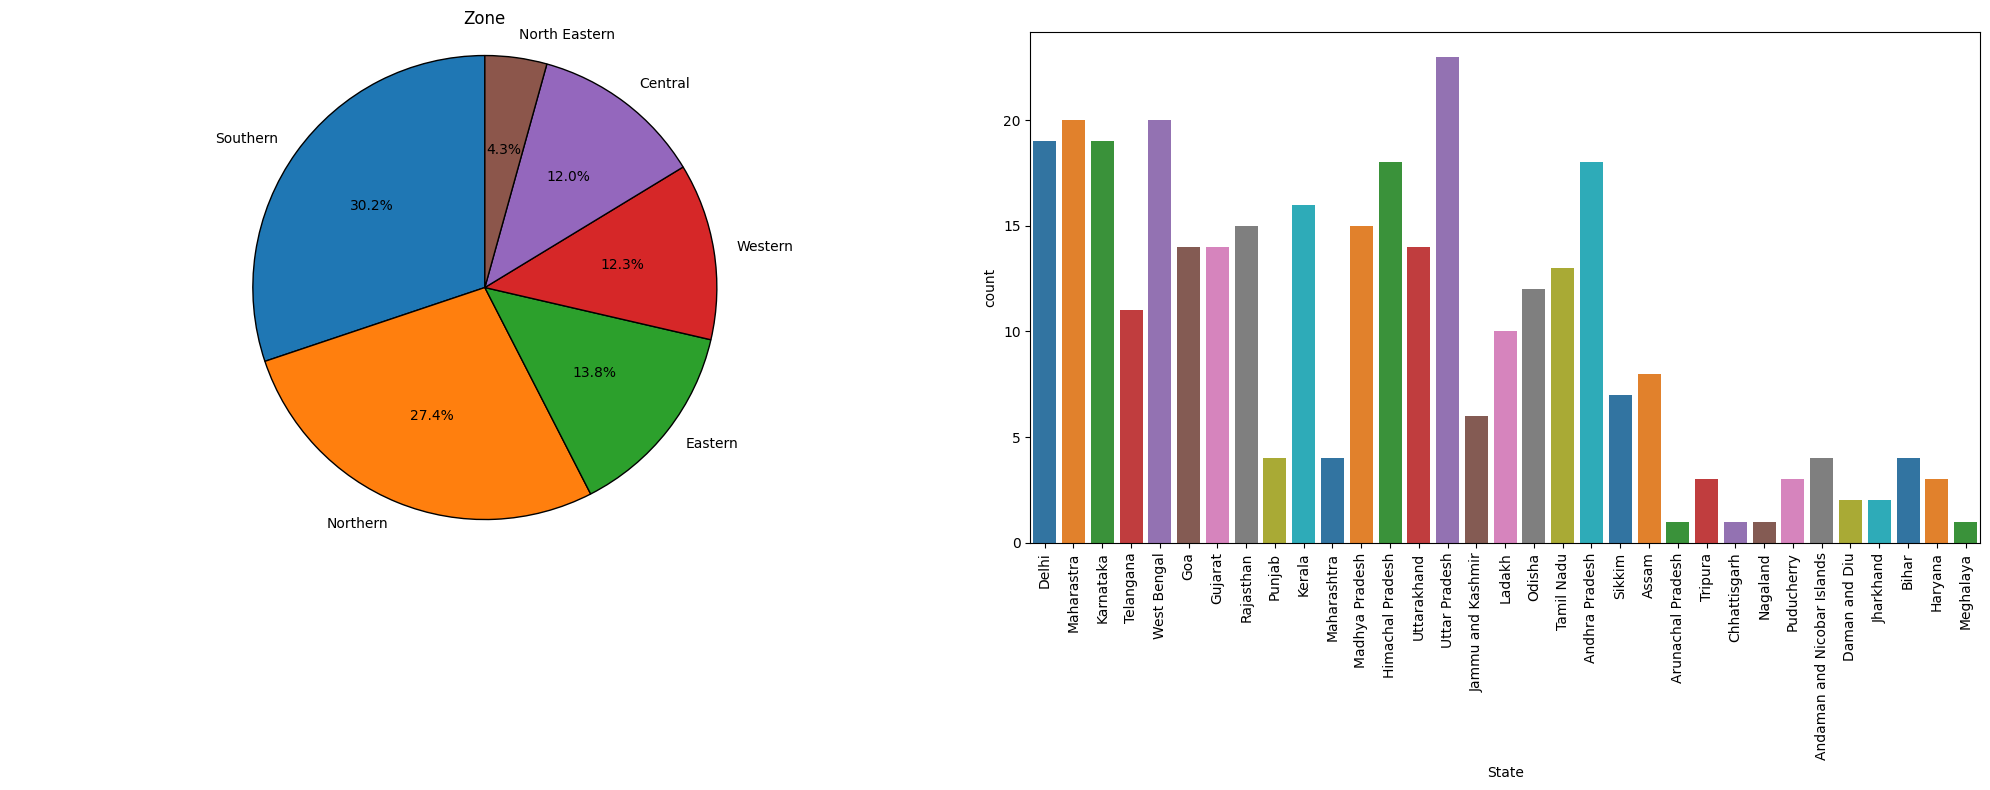

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

counts = df['Zone'].value_counts()
values = counts.values / len(df) * 100
labels = counts.index
axes[0].pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)
axes[0].set_title('Zone')
axes[0].axis("equal")  

sns.countplot(data=df, x='State', ax=axes[1], palette='tab10', hue='State', legend=False)
plt.xticks(rotation=90)

plt.tight_layout()

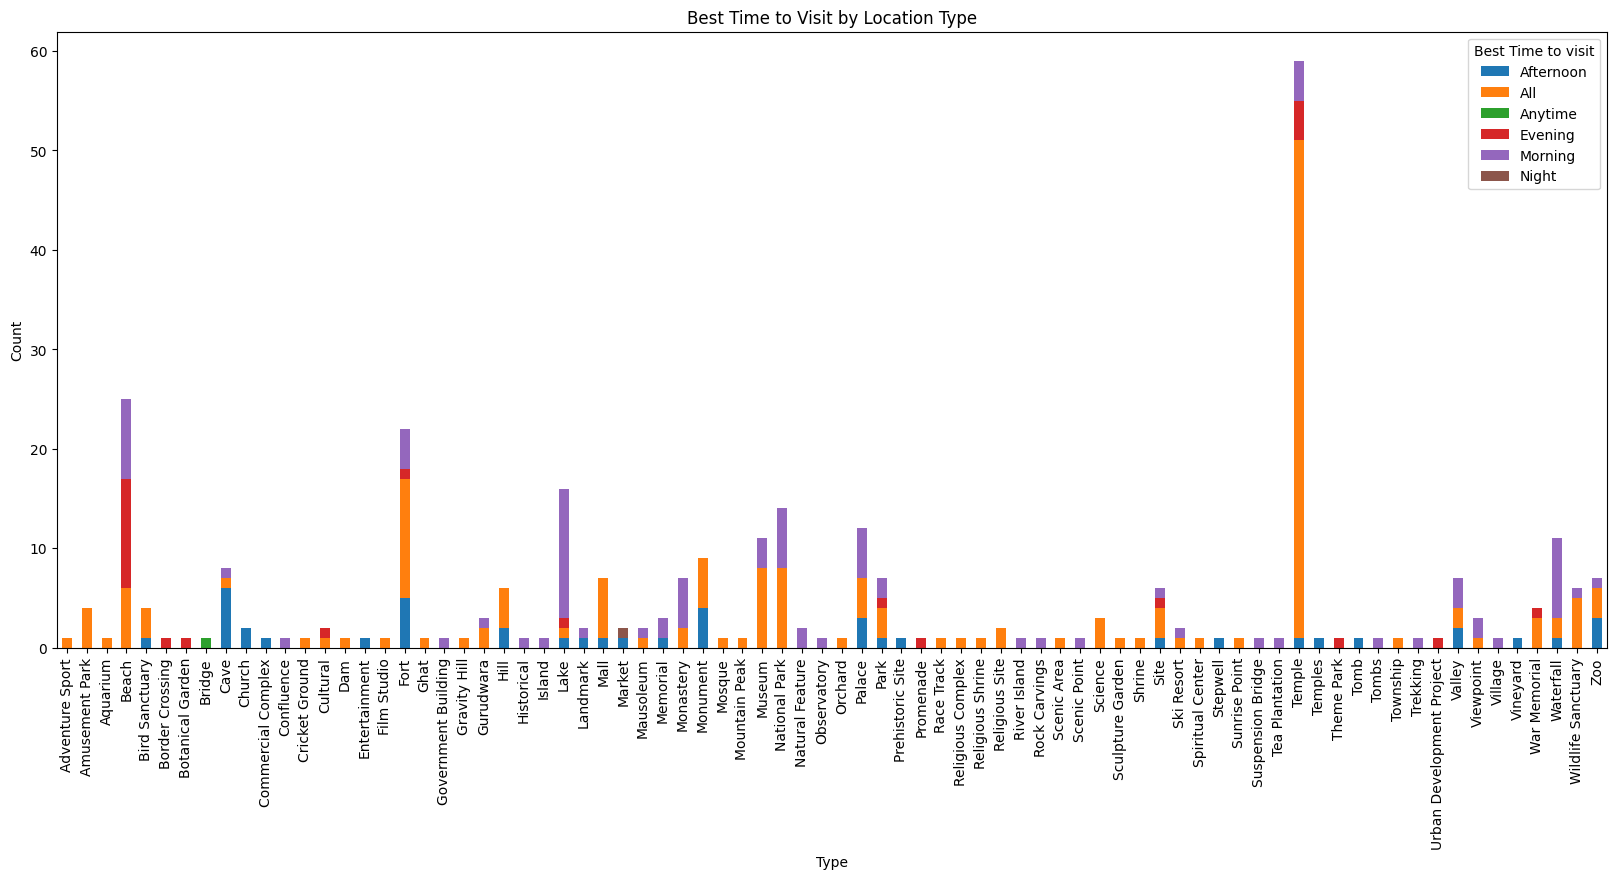

In [11]:
counts = pd.crosstab(df['Type'], df['Best Time to visit'])
counts.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Best Time to Visit by Location Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

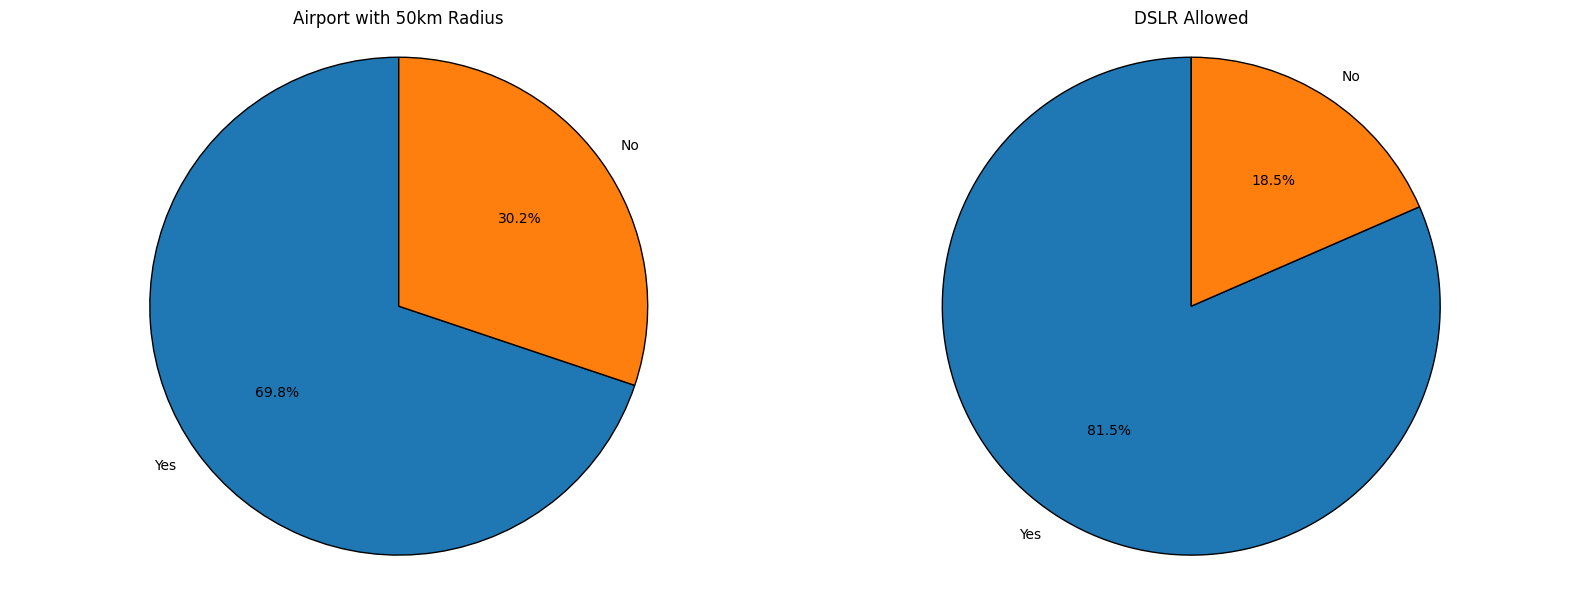

In [12]:
cols = ['Airport with 50km Radius', 'DSLR Allowed']

fig,ax = plt.subplots(1,2,figsize=(16,6))

for i,ax in enumerate(ax.flatten()):
    counts = df[cols[i]].value_counts()
    values = counts.values / len(df) * 100
    labels = counts.index
    ax.pie(
        values,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        wedgeprops={"edgecolor": "black"}
    )
    ax.set_title(cols[i])
    ax.axis("equal")  

plt.tight_layout()

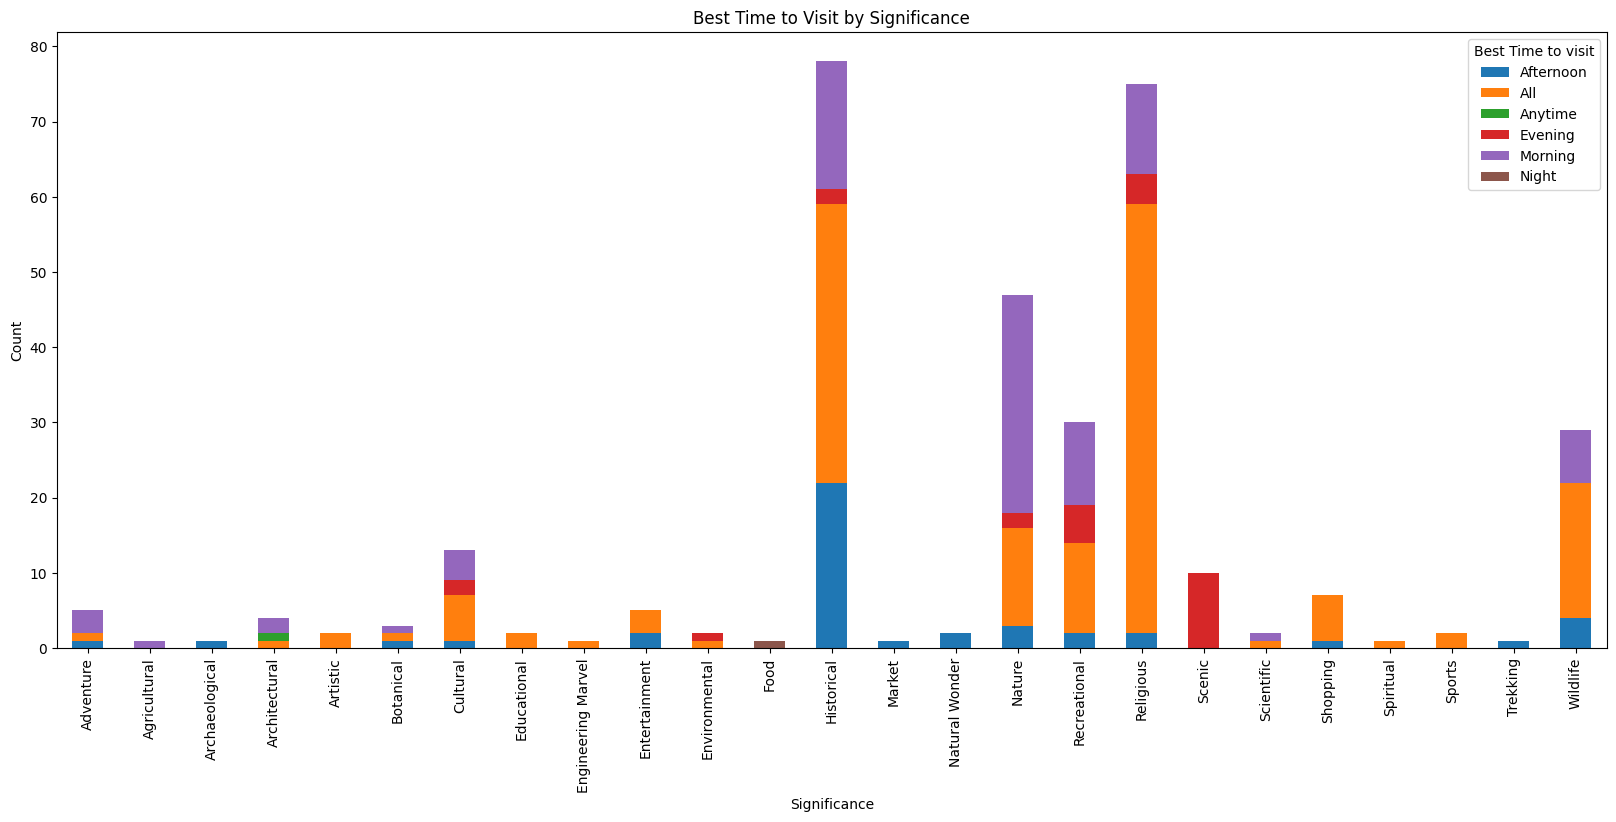

In [13]:
counts = pd.crosstab(df['Significance'], df['Best Time to visit'])
counts.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.title('Best Time to Visit by Significance')
plt.ylabel('Count')
plt.xticks(rotation=90);

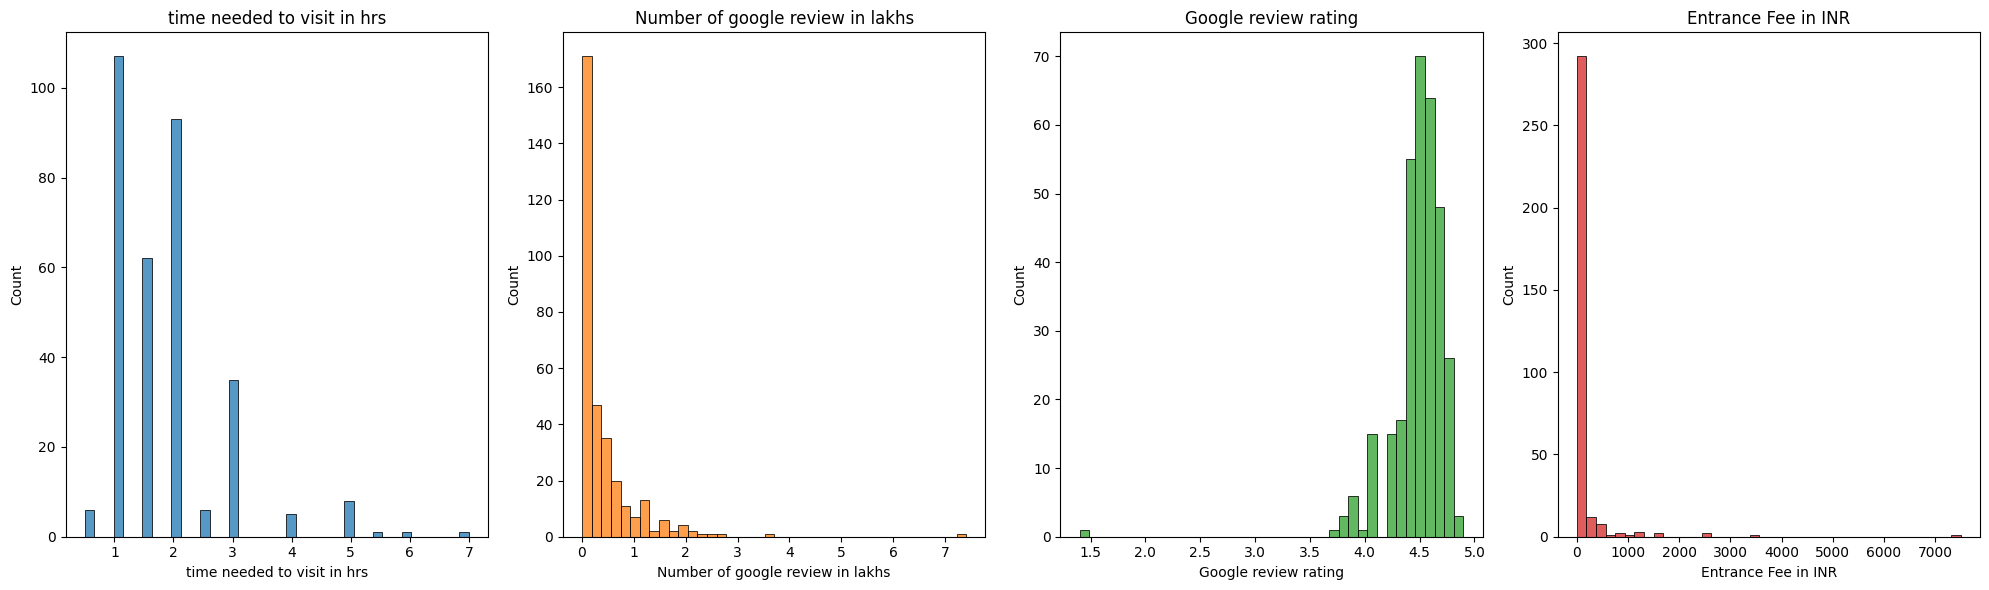

In [14]:
cols = ['time needed to visit in hrs', 'Number of google review in lakhs', 'Google review rating', 'Entrance Fee in INR']

colors = plt.get_cmap("tab10").colors

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(
        df[cols[i]],
        bins=40,
        color=colors[i],
        ax=ax
    )
    ax.set_title(cols[i])

plt.tight_layout()

In [15]:
C = df['Google review rating'].mean()
m = df['Number of google review in lakhs'].quantile(0.5)

df['pop_score'] = (
    (df['Number of google review in lakhs'] /(df['Number of google review in lakhs'] + m)) * df['Google review rating']
    +
    (m / (df['Number of google review in lakhs'] + m)) * C
)

In [16]:
geolocator = Nominatim(user_agent="my_geocoder_project_v1", timeout=10)

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def get_location(city):
    return geocode(f"{city}, India")


df['location_obj'] = df['City'].apply(get_location)
df['Latitude'] = df['location_obj'].apply(lambda loc: loc.latitude if loc else None)
df['Longitude'] = df['location_obj'].apply(lambda loc: loc.longitude if loc else None)
df = df.drop(columns=['location_obj'])

In [17]:
df.sample(5)

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit,pop_score,Latitude,Longitude
181,181,Central,Uttar Pradesh,Agra,Taj Mahal,Mausoleum,1632,2.0,4.6,50,Yes,Historical,Yes,2.25,Morning,4.592003,27.175255,78.009816
202,202,Northern,Ladakh,Nubra Valley,Nubra Valley,Valley,Unknown,2.0,4.5,0,No,Nature,Yes,0.10,All,4.491282,34.000667,77.820167
146,146,Central,Madhya Pradesh,Mandu,Jahaz Mahal,Site,1500,1.0,3.9,50,No,Historical,Yes,0.03,Afternoon,4.398231,23.797852,85.526332
239,239,Southern,Tamil Nadu,Kanyakumari,Vivekananda Rock Memorial,Memorial,1970,1.0,4.6,20,Yes,Historical,No,0.47,Morning,4.569760,8.079252,77.549934
77,77,Western,Gujarat,Ahmedabad,Kankaria Lake,Lake,1451,3.0,4.5,10,Yes,Recreational,Yes,0.30,Afternoon,4.494992,23.021537,72.580057


In [18]:
df.to_csv("final_data_with_coords.csv", index=False)

In [41]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1-a))

def recommend_weekend_trip(source_city,k=5):
    source_city = source_city.title()
    if source_city not in df['City'].values:
        return "City not found in database."

    source_row = df[df['City'] == source_city].iloc[0]
    s_lat, s_lon = source_row['Latitude'], source_row['Longitude']

    df['Distance_km'] = haversine(s_lat, s_lon, df['Latitude'], df['Longitude'])

    recommendations = df[
        (df['Distance_km'] > 0) & 
        (df['Distance_km'] <= 250)
    ].copy()
    recommendations['Final_Rank'] = recommendations['Google review rating'] * 0.7 + \
                                    (1 / (recommendations['Distance_km'] + 1)) * 0.3

    return recommendations.sort_values('Final_Rank', ascending=False)[['City', 'Name', 'Distance_km', 'Type', 'Google review rating']].head(k)

In [43]:
recommend_weekend_trip('Kolkata',k=10)

,City,Name,Distance_km,Type,Google review rating
220,Bolpur,Kankalitala Temple,138.966167,Temple,4.7
221,Hooghly,Hangseswari Temple,52.041494,Temple,4.6
232,Berhampur,Tara Tarini Temple,215.054816,Temple,4.6
218,Digha,Digha Beach,137.548255,Beach,4.5
219,Murshidabad,Hazarduari Palace,178.375134,Palace,4.5
224,Purulia,Ayodhya Hills,220.482110,Hill,4.5
217,Sundarbans,Sundarbans National Park,68.750460,National Park,4.4
234,Balasore,Chandipur Beach,190.683269,Beach,4.2


In [44]:
recommend_weekend_trip('Pune',k=10)

,City,Name,Distance_km,Type,Google review rating
20,Mumbai,Siddhivinayak Temple,119.495256,Temple,4.8
130,Kolhapur,Mahalakshmi Temple,206.308382,Temple,4.8
21,Mumbai,Mahalaxmi Temple,119.495256,Temple,4.7
128,Ratnagiri,Ganapatipule Temple,144.023424,Temple,4.7
126,Shirdi,Sai Baba Temple,153.077413,Temple,4.7
17,Mumbai,Gateway of India,119.495256,Monument,4.6
18,Mumbai,Chhatrapati Shivaji Maharaj Vastu Sangrahalaya,119.495256,Museum,4.6
16,Mumbai,Marine Drive,119.495256,Promenade,4.5
131,Lonavala,Karla Caves,53.592830,Cave,4.4
134,Matheran,Echo Point,80.649675,Viewpoint,4.4


In [45]:
recommend_weekend_trip('Bangalore',k=10)

,City,Name,Distance_km,Type,Google review rating
122,Halebidu,Halebidu Hoysaleswara Temple,106.418299,Temple,4.7
257,Puttaparthi,Prasanthi Nilayam,134.147248,Spiritual Center,4.7
241,Coimbatore,Marudamalai Temple,229.960254,Temple,4.7
111,Mysore,Mysore Palace,125.945608,Palace,4.6
252,Anantapur,Lepakshi,195.065554,Site,4.6
117,Shivamogga,Jog Falls,242.452508,Waterfall,4.6
115,Chikmagalur,Mullayanagiri,200.285437,Mountain Peak,4.5
101,Wayanad,Wayanad Wildlife Sanctuary,211.974823,Wildlife Sanctuary,4.5
256,Kadapa,Gandikota Fort,213.217554,Fort,4.5
245,Yercaud,Yercaud Lake,148.502014,Lake,4.2
